<h3>Frequency Value Distribution</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

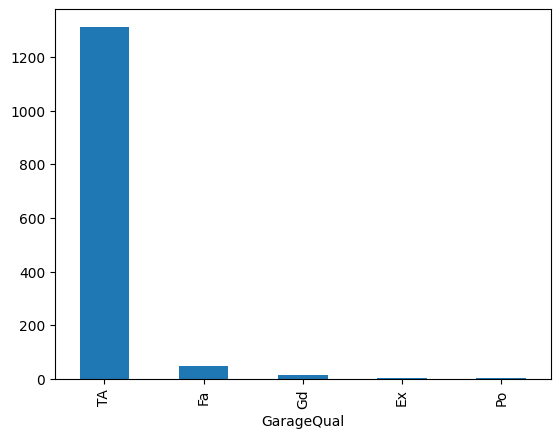

In [4]:
df["GarageQual"].value_counts().plot(kind="bar")

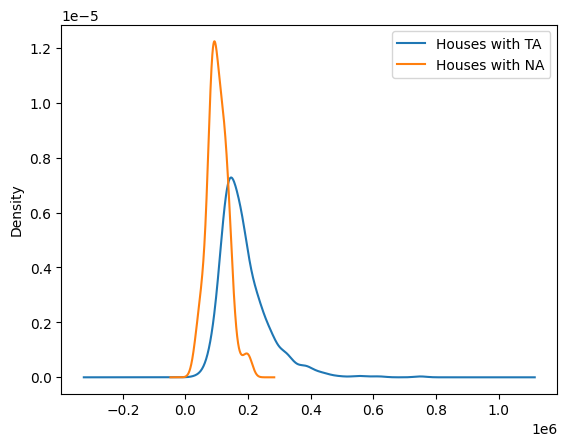

In [10]:
# plot distribution of data with na values and 
fig = plt.figure()
ax = plt.subplot(111)
df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind="kde",ax=ax)
df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde",ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
plt.legend(labels=labels)

<Axes: xlabel='GarageQual'>

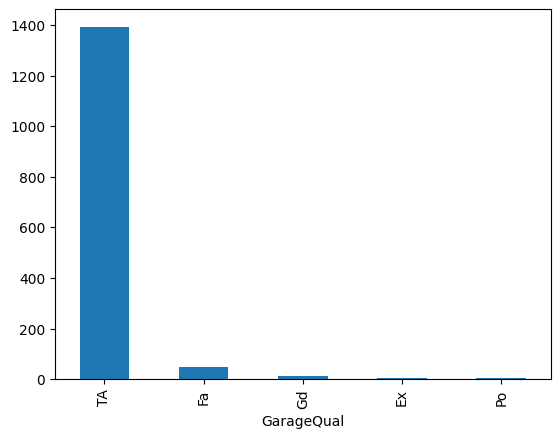

In [19]:
temp=df[df["GarageQual"]=="TA"]["SalePrice"]
df["GarageQual"].fillna("TA",inplace=True)
df["GarageQual"].value_counts().plot(kind="bar")


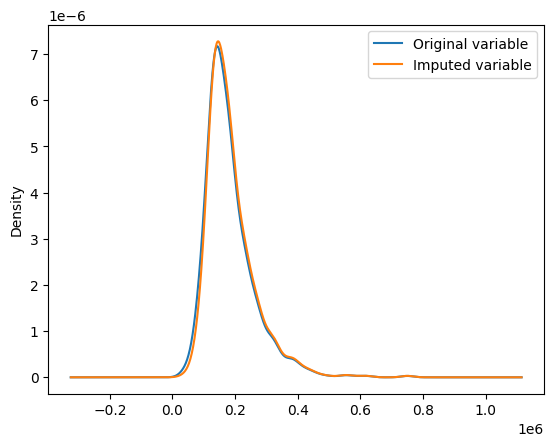

In [27]:
#let's plot distribution after imputing values
ax = plt.subplot(111)
df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind="kde")
temp.plot(kind="kde")
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
plt.legend(labels=labels)
#distribution is same because of less na values

<h3>Using sklearn</h3>

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=["SalePrice"]),df["SalePrice"],random_state=42,test_size=0.2)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)


c:\Users\HEET BHATT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [31]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)